In [1]:
import numpy as np
import os

In [2]:
# defining the sigmoid function
def sigmoid(z) -> float:
    return 1/(1+np.exp(-z))

# Logistic Regression with single training example

In [3]:
# Logistic regression with single training example and two features
# Features and label values initialization
x1 = np.random.randint(10)
x2 = np.random.randint(10)
y = np.random.randint(2)

print("x1 value is: ",x1)
print("x2 value is: ",x2)
print("y value is: ",y)

x1 value is:  8
x2 value is:  5
y value is:  0


In [4]:
# Wieghts variables initialization
w1 = np.random.random()
w2 = np.random.random()
b = np.random.random()

print("w1 value is: ",round(w1,4))
print("w2 value is: ",round(w2,4))
print("b value is: ",round(b,4))

w1 value is:  0.6215
w2 value is:  0.3081
b value is:  0.3476


In [5]:
# Gradient descent hyperparameters (number of iterations and learning rates)
num_iterations = 1000
lr = 0.05

for i in range(num_iterations):
    
    #Forward propagation
    z = w1 * x1 + w2 * x2 + b
    a = sigmoid(z)
    l= -((y * np.log(a) + (1-y) * (np.log(1-a))))
    
    #Backward Propagation
    dz = a-y
    dw1 = x1 * dz
    dw2 = x2 * dz
    db = dz
    
    #Wieghts update
    w1 = w1 - lr * dw1
    w2 = w2 - lr * dw2
    b  = b  - lr * db

In [6]:
#Ultimate weight values
print("w1 ultimate value is: ",round(w1,4))
print("w2 ultimate value is: ",round(w2,4))
print("b ultimate value is: ",round(b,4))
print("predected label ultimate value is: ",round(a,4))

w1 ultimate value is:  -0.7361
w2 ultimate value is:  -0.5404
b ultimate value is:  0.1779
predected label ultimate value is:  0.0002


# Logistic Regression with m training example (Non-vectorized)

In [7]:
# Logistic regression with single 10 example and two features
# Features and label values initialization
m = 10
n = 2
X = np.random.randint(10,size=(n,m))
Y = np.random.randint(2, size=(1,m))

print('training examples values:\n', X)
print('training labels values:\n', Y)

training examples values:
 [[8 3 7 8 0 1 3 7 8 5]
 [5 7 7 5 7 7 1 7 5 8]]
training labels values:
 [[1 1 0 1 1 1 1 1 0 1]]


In [8]:
# Wieghts variables initialization
w1 = 0.
w2 = 0.
b = 0.

print("w1 value is: ",round(w1,4))
print("w2 value is: ",round(w2,4))
print("b value is: ",round(b,4))

w1 value is:  0.0
w2 value is:  0.0
b value is:  0.0


In [9]:
# Gradient descent hyperparameters (number of iterations and learning rates)
num_iterations = 10000
lr = 0.01
#cost function and Derivatives initialization
J = 0.
dw1 = 0.
dw2 = 0.
db = 0.

In [10]:
# Training
for iteration in range(num_iterations):
    
    for i in range(len(X.T)):
        #Forward propagation
        zi = w1 * X[:,i][0] + w2 * X[:,i][1] + b
        ai = sigmoid(zi)
        J += -((Y[0][i] * np.log(ai) + (1-Y[0][i]) * (np.log(1-ai))))
        
        #backward propagation
        dzi = ai - Y[0][i]
        dw1 += X[:,i][0] * dzi
        dw2 += X[:,i][1] * dzi
        db += dzi

    #Cost function and derivatives averaging   
    J /= m
    dw1 /= m
    dw2 /= m
    db /= m
    # Weights update
    w1 = w1 - lr * dw1
    w2 = w2 - lr * dw2
    b  = b  - lr * db

In [11]:
#Ultimate weight values
print("w1 ultimate value is: ",round(w1,2))
print("w2 ultimate value is: ",round(w2,2))
print("b ultimate value is: ",np.round(b,2))

w1 ultimate value is:  -0.41
w2 ultimate value is:  0.11
b ultimate value is:  3.06


In [12]:
def predict_y(x1: float, x2:float) -> float:
    return round(sigmoid(w1 * x1 + w2 * x2 + b),2)

In [13]:
for i in range(len(X.T)):
    
    print('x1 = ', X[:,i][0],
          '  ', 'x2 = ', X[:,i][0],
          '  ', 'y = ', Y[0][i])
    
    print('pridicted y label       = ',
         predict_y(X[:,i][0], X[:,i][1]), 
          '\n')

x1 =  8    x2 =  8    y =  1
pridicted y label       =  0.59 

x1 =  3    x2 =  3    y =  1
pridicted y label       =  0.93 

x1 =  7    x2 =  7    y =  0
pridicted y label       =  0.73 

x1 =  8    x2 =  8    y =  1
pridicted y label       =  0.59 

x1 =  0    x2 =  0    y =  1
pridicted y label       =  0.98 

x1 =  1    x2 =  1    y =  1
pridicted y label       =  0.97 

x1 =  3    x2 =  3    y =  1
pridicted y label       =  0.87 

x1 =  7    x2 =  7    y =  1
pridicted y label       =  0.73 

x1 =  8    x2 =  8    y =  0
pridicted y label       =  0.59 

x1 =  5    x2 =  5    y =  1
pridicted y label       =  0.87 



# Logistic Regression with m training example (Vectorized)

In [14]:
# Logistic regression with single 10 example and two features
# Features and label values initialization
m = 10
n = 2
X = np.random.randint(10,size=(n,m))
Y = np.random.randint(2, size=(1,m))

print('training examples values:\n', X)
print('training labels values:\n', Y)

training examples values:
 [[7 5 3 2 7 2 0 3 3 5]
 [1 7 6 3 3 0 7 9 0 4]]
training labels values:
 [[0 1 0 1 1 0 1 0 1 0]]


In [15]:
# Wieghts variables initialization
w = np.zeros(shape = (n,1))
b = 0
print("weight variables value are: \n",w)
print("bias variables value are: ",np.round(b,4))

weight variables value are: 
 [[0.]
 [0.]]
bias variables value are:  0


In [16]:
# Gradient descent hyperparameters (number of iterations and learning rates)
num_iterations = 10000
lr = 0.001

In [17]:
for i in range(num_iterations):
    #Forward propagation
    Z = np.dot(w.T,X) + b
    A = sigmoid(Z)
    cost = (-1/m)*(np.dot(Y,np.log(A).T) + np.dot((1-Y),np.log(1-A).T))
    
    #Backward propagation
    dZ = A-Y
    dw = (1/m) * np.dot(X, dZ.T)
    db1 = (1/m) * np.sum(dZ)
    
    #Weights updatae
    w = w - lr * dw
    b = b - lr * db1
    if i %  1000 == 0:
        print(cost)

[[0.69314718]]
[[0.68884086]]
[[0.68837724]]
[[0.68800774]]
[[0.68766417]]
[[0.68734353]]
[[0.68704426]]
[[0.68676494]]
[[0.68650424]]
[[0.68626091]]


In [18]:
#Ultimate weight values
print("w ultimate value is: \n",np.round(w,2),'\n')
print("b ultimate value is: ", np.round(b,2))

w ultimate value is: 
 [[-0.08]
 [ 0.01]] 

b ultimate value is:  0.17


# Image classification - Real example

## 2 - Overview of the Problem set ##

**Problem Statement**: You are given a dataset ("data.h5") containing:
    - a training set of m_train images labeled as cat (y=1) or non-cat (y=0)
    - a test set of m_test images labeled as cat or non-cat
    - each image is of shape (num_px, num_px, 3) where 3 is for the 3 channels (RGB). Thus, each image is square (height = num_px) and (width = num_px).

You will build a simple image-recognition algorithm that can correctly classify pictures as cat or non-cat.

Let's get more familiar with the dataset. Load the data by running the following code.

In [19]:
import numpy as np
import os
import matplotlib.pyplot as plt
import h5py
import scipy
from PIL import Image
from scipy import ndimage
# for windows os flip the forward slash (/) into backward slash (\)
os.chdir('../utils')
from lr_utils import load_dataset

%matplotlib inline

In [20]:
# Loading the data (cat/non-cat)
train_set_x_orig, train_set_y, test_set_x_orig, test_set_y, classes = load_dataset()

#data set meta-data

m_train = train_set_x_orig.shape[0]
m_test = test_set_x_orig.shape[0]
num_px = train_set_x_orig.shape[2]

print("Number of training examples: m_train = ", m_train,'\n' )
print("Number of testing examples: m_test = ",m_test,'\n' )
print("Height/Width of each image: num_px = ", num_px,'\n' )
print("the training set shape is   : ",train_set_x_orig.shape,'\n' )
print("tha tarining labels shape is: ",train_set_y.shape,'\n' )
print("the test set shape is       : ",test_set_x_orig.shape,'\n' )
print("the test set labels shape is: ",test_set_y.shape,'\n' )
print("the number of classes is    : ",np.squeeze(classes.shape),'\n' )

Number of training examples: m_train =  209 

Number of testing examples: m_test =  50 

Height/Width of each image: num_px =  64 

the training set shape is   :  (209, 64, 64, 3) 

tha tarining labels shape is:  (1, 209) 

the test set shape is       :  (50, 64, 64, 3) 

the test set labels shape is:  (1, 50) 

the number of classes is    :  2 



y = [1], it's a 'cat' picture.


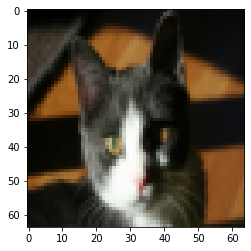

In [24]:
# Example of a picture
index = 19
plt.imshow(train_set_x_orig[index])
print ("y = " + str(train_set_y[:, index]) + ", it's a '" + classes[np.squeeze(train_set_y[:, index])].decode("utf-8") +  "' picture.")

In [25]:
# Data set reshaping
train_set_x_flatten = train_set_x_orig.reshape(train_set_x_orig.shape[0],-1).T
test_set_x_flatten = test_set_x_orig.reshape(test_set_x_orig.shape[0],-1).T

print ("train_set_x_flatten shape   : " ,train_set_x_flatten.shape)
print ("train_set_y shape           : " ,train_set_y.shape)
print ("test_set_x_flatten shape    : " ,(test_set_x_flatten.shape))
print ("test_set_y shape            : " ,(test_set_y.shape))
print ("sanity check after reshaping: " ,(train_set_x_flatten[0:5,0]))

train_set_x_flatten shape   :  (12288, 209)
train_set_y shape           :  (1, 209)
test_set_x_flatten shape    :  (12288, 50)
test_set_y shape            :  (1, 50)
sanity check after reshaping:  [17 31 56 22 33]


In [26]:
#Data normalization
train_set_x = train_set_x_flatten/255.0
test_set_x  = test_set_x_flatten/255.0

In [27]:
# defining the sigmoid function
def sigmoid(z):
    s = 1/(1+np.exp(-z))
    return s

In [28]:
def initialize_parameters(num_features):
    
    w = np.zeros((num_features,1))
    b = 0
    assert (w.shape == (num_features,1))
    assert(isinstance(b, float) or isinstance(b, int))
    
    return w, b    

In [29]:
initialize_parameters(2)

(array([[0.],
        [0.]]),
 0)

In [30]:
def forward_prop(w,b,X,Y):
    
    m = X.shape[1]
    
    #Forward propagation
    Z = np.dot(w.T,X) + b
    A = sigmoid(Z)
    cost = (-1/m)*(np.dot(Y,np.log(A).T)+ np.dot((1-Y),np.log(1-A).T))
    
    assert (A.shape == (1,m))
    cost = np.squeeze(cost)
    assert(cost.shape == ())
    
    return A, cost

In [31]:
def backward_prop(X, Y, A):
    
    n = X.shape[0]
    m = X.shape[1]
    #Backward propagation
    dZ = A-Y
    dw = (1/m) * np.dot(X, dZ.T)
    db = (1/m) * np.sum(dZ)
    
    assert(dw.shape == (n,1))
    assert(db.dtype == float)    
    
    grads = {"dw": dw,
             "db": db}
    
    return grads

In [32]:
def optimize(w, b, X, Y, num_iterations, learning_rate, print_cost = False):
    
    costs = []
    
    for i in range(num_iterations):
        
        # forward propagation calculation
        A, cost = forward_prop(w, b, X, Y)
        
        #backward propagation calculation
        grads = backward_prop(X, Y, A)
        dw = grads['dw']
        db = grads['db']
        
        #weights update
        w = w - learning_rate * dw
        b = b - learning_rate * db
        
        
        # Record the costs every 100 iteration
        if i % 100 == 0:
            costs.append(cost)
        
        # Print the cost every 100 training iterations
        if print_cost and i % 100 == 0:
            print ("Cost after iteration %i: %f" %(i, cost))
        
    params = {"w": w,
              "b": b}
    
    grads = {"dw": dw,
             "db": db}
    
    return params, grads, costs

In [33]:
def predict(w, b, X):
    
    m = X.shape[1]
    n = X.shape[0]
    
    Y_hat = np.zeros((1,m))
    w = w.reshape(n, 1)
    
    A = sigmoid(np.dot(w.T,X)+b)
    
    for i in range(m):
        
        if(A[0][i] <= 0.5):
            Y_hat[0][i] = 0
        else:
            Y_hat[0][i] = 1

    
    assert(Y_hat.shape == (1, m))
    
    return Y_hat

In [34]:
def model(X_train, Y_train, X_test, Y_test, num_iterations = 2000, learning_rate = 0.5, print_cost = False):
    
    w, b = initialize_parameters(X_train.shape[0])
    
    parameters, gradients, costs = optimize(w, b, X_train, Y_train, num_iterations, learning_rate, print_cost)
    
    w, b = parameters['w'], parameters['b'] 
    
    Y_prediction_test = predict(w, b, X_test)
    Y_prediction_train = predict(w, b, X_train)
    
    # Print train/test Errors
    print("train accuracy: {} %".format(100 - np.mean(np.abs(Y_prediction_train - Y_train)) * 100))
    print("test accuracy: {} %".format(100 - np.mean(np.abs(Y_prediction_test - Y_test)) * 100))

    d = {"costs": costs,
         "Y_prediction_test": Y_prediction_test, 
         "Y_prediction_train" : Y_prediction_train, 
         "w" : w, 
         "b" : b,
         "learning_rate" : learning_rate,
         "num_iterations": num_iterations}
    
    return d

In [36]:
d = model(train_set_x, train_set_y, test_set_x, test_set_y, num_iterations = 1000, learning_rate = 0.005, print_cost = False)

train accuracy: 96.65071770334929 %
test accuracy: 72.0 %


# This is the end of the story